# DOCUMENTS ANALISYS IN THE EDMS - GEPOL

## 1-Import libraries (APIs for processing data)

In [ ]:
# si se va usar en un cuaderno web (como Deepnote o Google Colab), es bueno instalar la librería Tensorflow en la maquina virtual.
#!pip install tensorflow

In [ ]:
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as ss
from scipy.stats import gaussian_kde
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 

2023-10-06 14:42:46.744039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-06 14:42:46.855435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-06 14:42:46.855459: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-06 14:42:46.879296: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-06 14:42:49.132678: W tensorflow/stream_executor/platform/de

## 2-Read data with pandas library (Data Wrangling)

### Read file with pandas library

In [ ]:
data = pd.read_json('/work/produccion documental GEPOL.json')
data

Mes  Dia  Cantidad  NoMes
0         ENERO   31       384      1
1         ENERO   19       351      1
2         ENERO    4       410      1
3         ENERO   26       415      1
4         ENERO   10       273      1
..          ...  ...       ...    ...
268  SEPTIEMBRE   26       565      9
269  SEPTIEMBRE   27       386      9
270  SEPTIEMBRE   28       333      9
271  SEPTIEMBRE   29       347      9
272  SEPTIEMBRE   30       176      9

[273 rows x 4 columns]

### Sort data - (for month number column (NoMes))

In [ ]:
order_by_month = data.sort_values('NoMes')# metodo sort
order_by_month.head(10)

Mes  Dia  Cantidad  NoMes
0   ENERO   31       384      1
34  ENERO    2       329      1
35  ENERO    5       270      1
36  ENERO   12       291      1
62  ENERO   23       366      1
63  ENERO   30       336      1
64  ENERO   22       250      1
65  ENERO    3       323      1
66  ENERO   13       275      1
96  ENERO   21       283      1

## 3-Data Visualization

### BarChart - (Documents consolidate 2023 year)

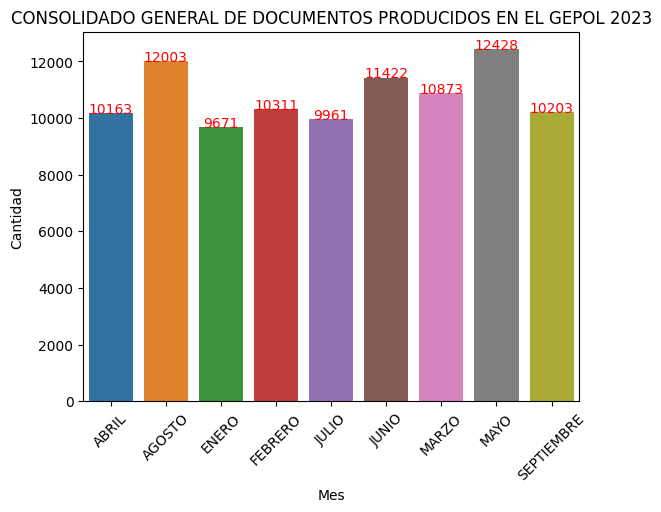

In [ ]:
groupedvalues = data.groupby('Mes').sum().reset_index() #metodo groupby
g = sns.barplot(x = 'Mes', y = 'Cantidad', data = groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.Cantidad - 2, round(row.Cantidad, 2), color = 'red', ha = "center")

plt.xticks(rotation=45)
plt.title('CONSOLIDADO GENERAL DE DOCUMENTOS PRODUCIDOS EN EL GEPOL 2023')
plt.savefig('/work/produccion documental GEPOL1S.jpg')

## Barplot order (Min-Max)

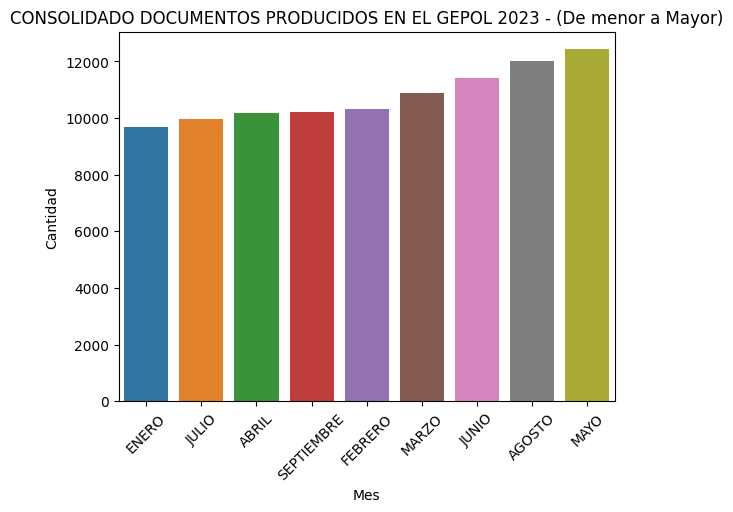

In [ ]:
#Organizar los datos de menor a mayor según la columna 'Cantidad' 
groupedvalues = data.groupby('Mes').sum().reset_index() 
groupedvalues = groupedvalues.sort_values(by='Cantidad', ascending=True) 
 
#Crear gráfico de barras 
g = sns.barplot(x='Mes', y='Cantidad', data=groupedvalues) 

plt.xticks(rotation=45)
plt.title('CONSOLIDADO DOCUMENTOS PRODUCIDOS EN EL GEPOL 2023 - (De menor a Mayor)')

#Mostrar gráfico 
plt.show() 

### Pie Chart - (Percentages)

In [ ]:
#Crear gráfico de torta 
fig = px.pie(data, names='Mes', values='Cantidad', title= 'PORCENTAJE DE DOCUMENTOS PRODUCIDOS EN EL GEPOL - (MES A MES)') 
 
#Centrar título
fig.update_layout(title_x=0.5)

#Añadir información a la leyenda 
fig.update_layout(legend_title_text='Mes de producción')

#Mostrar gráfico 
fig.show() 

### Pairplot chart -(Produced documents for GEPOL)

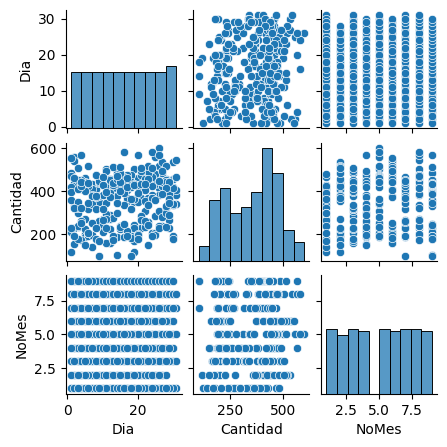

In [ ]:
sns.pairplot(data,height=1.5)

### Violin chart -(Produced documents for GEPOL)

Text(0.5, 1.0, 'CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL MES 01 Y 02 - 2023')

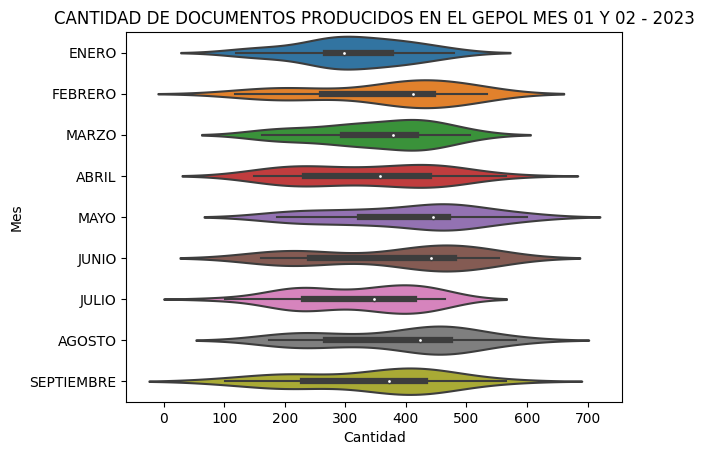

In [ ]:
sns.violinplot(data=data, x="Cantidad", y="Mes")
plt.title('CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL MES 01 Y 02 - 2023')

### Catplot chart -(Produced documents for GEPOL)

Text(0.5, 1.0, 'CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL')

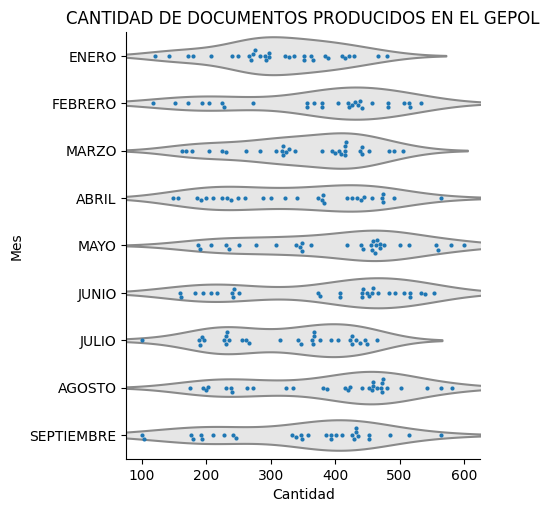

In [ ]:
sns.catplot(data=data, x="Cantidad", y="Mes", kind="violin", color=".9", inner=None)
sns.swarmplot(data=data, x="Cantidad", y="Mes", size=3)
plt.title('CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL')

### Scatterplot chart -(Produced documents for GEPOL)

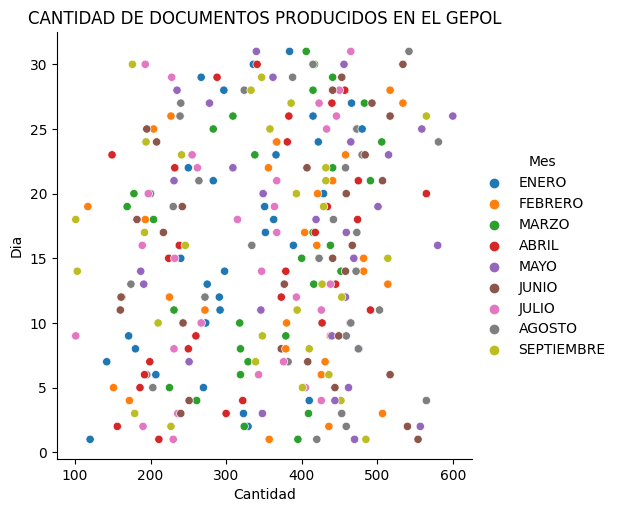

In [ ]:
sns.relplot(data=data, x="Cantidad", y="Dia", hue="Mes")
plt.title('CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL')
plt.savefig('/work/produccion documental GEPOL.jpg')

### Scatterplot chart ordeded - (Days transcurred month to month)

In [ ]:
#Crear scatter plot
fig = px.scatter(data_frame=data, x='Mes', y='Dia', text='Cantidad', title='CANTIDAD DE DOCUMENTOS PRODUCIDOS MENSUAL EN EL GEPOL - (DIA A DIA)')

#Cambiar nombre de los ejes
fig.update_xaxes(title_text='Mes')
fig.update_yaxes(title_text='Número de días transcurridos')

#Centrar el título
fig.update_layout(title_x=0.5)

#Mostrar gráfica
fig.show()

#Expotar a pagina html para tener una gráfica interactiva
fig.write_html("grafico_dispersion_pordia.html")

### Scatterplot chart  - (Documents quanty for day)

In [ ]:
#Crear scatter plot o grafica de dispersión
fig = px.scatter(data_frame=data, x='Mes', y='Cantidad', text='Dia', title='CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL - AÑO 2023 (MENOR A MAYOR)',
                 color_discrete_sequence=px.colors.qualitative.Prism)


#Personalizar apariencia de la leyenda
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='SlateGrey')),
                  selector=dict(mode='markers+text'))

#Cambiar nombre de los ejes
fig.update_xaxes(title_text='Mes')
fig.update_yaxes(title_text='Cantidad de documentos producidos por dia')

#Centrar título del gráfico
fig.update_layout(title_x=0.5)

#Plotear la gráfica
fig.show()

## 4-Descriptive statistic

### Media

In [ ]:
#calculo de la media o promedio - https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii
#La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.
media=data["Cantidad"].mean()

print("la media es:", media)

la media es: 355.43956043956047


### Median

In [ ]:
#calculo de la mediana -https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana=data["Cantidad"].median()

print("La mediana es:", mediana)

La mediana es: 377.0


### Mode

In [ ]:
#Calculo de la moda - 
#La moda es el valor más repetido (solo aplicable a variables discretas).
moda=data["Cantidad"].mode()
print("La moda es:", moda)

La moda es: 0    441
dtype: int64


### Quantile

In [ ]:
p90 = data["Cantidad"].quantile(0.9)
print("El cuartil y percentil es: ", p90)

#El concepto es igual al de mediana, salvo que aquí la división ya no es en el 50%. 
#El 25% de las observaciones es menor que el primer cuartil. 
#Los cuartiles abarcan el 25%, 50% y 75% de las observaciones. Los percentiles son una generalización con cualquier porcentaje.

El cuartil y percentil es:  484.8


### Skew

In [ ]:
asimetria = ss.skew(data["Cantidad"])#se calcula con el metodo skew
print("La asimetría es: ", asimetria)

#Para saber si los datos estan repartidos de forma simétrica existen varios coeficientes: Pearson, Fisher, Bowley-Yule, etc

#Para no liarnos demasiado, podemos usar la función skew de SciPy.

#Para valores cercanos a 0, la variable es simétrica. Si es positiva tiene cola a la derecha y si es negativa tiene cola a la izquierda.

#Y con esto hemos visto los datos que se pueden extraer de una sola variable.

La asimetría es:  -0.22958532535530068


### Statistic resume

In [ ]:
# Realizar de un resumen estadístico del DataFrame
data['Cantidad'].describe()

count    273.000000
mean     355.439560
std      116.404234
min      101.000000
25%      246.000000
50%      377.000000
75%      446.000000
max      600.000000
Name: Cantidad, dtype: float64

### DataFrame count

In [ ]:
#Conteo de Indices o filas con datos en el DataFrame
data.count()

Mes         273
Dia         273
Cantidad    273
NoMes       273
dtype: int64

### Interactive asimetric chart

In [ ]:
#Calcula la asimetría 
skewness = data['Cantidad'].skew() 
 
#Crea un histograma para visualizar la distribución de datos 
fig = go.Figure() 
 
fig.add_trace(go.Histogram(x=data['Cantidad'], nbinsx=30)) 
 
#Agrega una línea vertical para mostrar la media 
media = data['Cantidad'].mean() 
fig.add_trace(go.Scatter(x=[media, media], y=[0, max(np.histogram(data['Cantidad'], bins=30)[0])],  
                         mode='lines', name='Media', line=dict(color='red', width=2))) 
 
#Agrega texto para mostrar la asimetría en el gráfico 
fig.add_annotation(x=media, y=max(np.histogram(data['Cantidad'], bins=30)[0]), 
                   text=f"Asimetría: {skewness:.2f}", showarrow=True, arrowhead=2, ax=0, ay=-40) 
 
#Configura el diseño del gráfico 
fig.update_layout(title_text='ASIMETRÍA INTERACTIVA PRODUCCIÓN DE DOCUMENTOS GEPOL - AÑO 2023', 
                  xaxis_title='Valor', 
                  yaxis_title='Frecuencia') 
 
#Centrar el título
fig.update_layout(title_x=0.5)

#Muestra el gráfico 
fig.show()

### Asimetric chart

/tmp/ipykernel_418/755642111.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'ASIMETRÍA ESTADISTICA DOCUMENTOS PRODUCIDOS EN EL GEPOL - AÑO 2023')

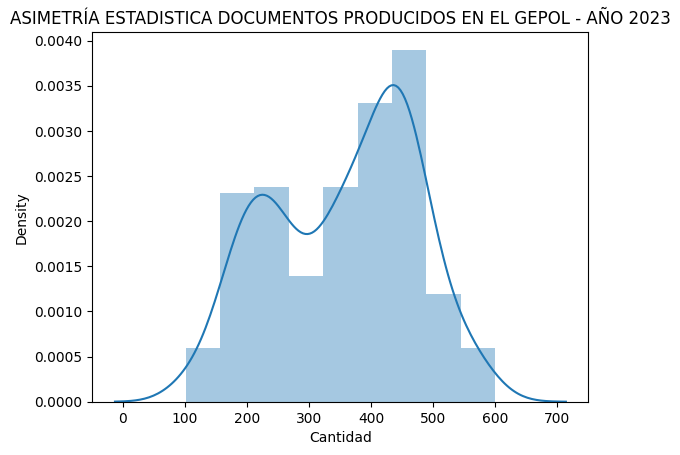

In [ ]:
#Representación gráfica de la asimetría
sns.distplot(data['Cantidad']);
plt.title('ASIMETRÍA ESTADISTICA DOCUMENTOS PRODUCIDOS EN EL GEPOL - AÑO 2023')

### Asimetric chart with red line

/tmp/ipykernel_418/4178020522.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




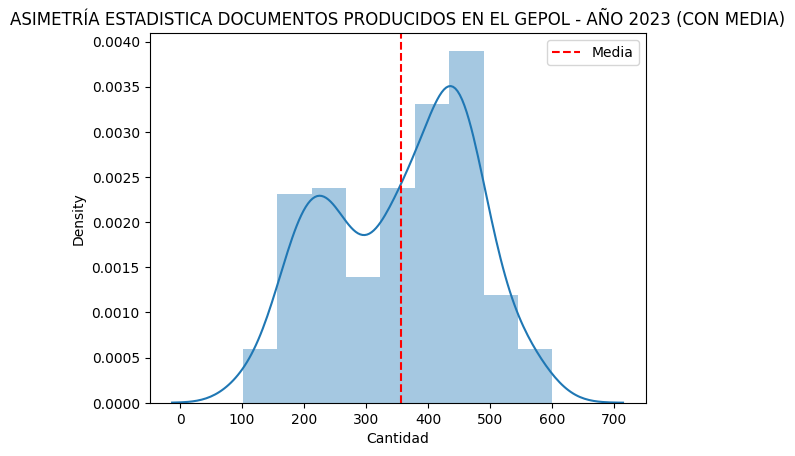

In [ ]:
#Crea el gráfico de distribución utilizando sns.distplot() 
sns.distplot(data['Cantidad']) 
 
#Calcula la media de los datos 
media = data['Cantidad'].mean() 
 
#Agrega una línea vertical para mostrar la media 
plt.axvline(x=media, color='red', linestyle='--', label='Media') 
 
#Agrega una leyenda al gráfico 
plt.legend() 

plt.title('ASIMETRÍA ESTADISTICA DOCUMENTOS PRODUCIDOS EN EL GEPOL - AÑO 2023 (CON MEDIA)')
 
#Muestra el gráfico 
plt.show()

## 5-Data prediction 

### Create Recurrent Neural Network - (based on the data analyzed)

In [ ]:
#Ordenar los datos por "NoMes" y "Dia" de manera ascendente.
data = data.sort_values(by=['NoMes', 'Dia']) # se utiliza el metodo .sort() de pandas

#Seleccionar último mes
ultimo_mes = data['NoMes'].max()# se tomará la variable más reciente

#Filtrar datos para obtener solo los registros del último mes
ultimo_mes_data = data[data['NoMes'] == ultimo_mes]

#Obtener último día, último valor de "Cantidad" y convertirlos a un arreglo de numpy
ultimo_dia = ultimo_mes_data['Dia'].values[-1]
ultima_cantidad = ultimo_mes_data['Cantidad'].values[-1]

#Escalar datos para mejorar rendimiento en la red neuronal
scaler = MinMaxScaler()
data['Cantidad'] = scaler.fit_transform(data['Cantidad'].values.reshape(-1, 1))

#Crear secuencias de entrada y salida para la RNN
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

#Definir longitud de la secuencia (cuántos días se usarán para predecir el siguiente)
sequence_length = 8

#Crear secuencias de entrada y salida para la RNN
X = create_sequences(data['Cantidad'].values, sequence_length)
y = data['Cantidad'].values[sequence_length:]

#Dividir datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#Construir la red neuronal recurrente
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

#Compilar modelo
model.compile(optimizer='adam', loss='mean_squared_error')

#Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

#Realizar predicción para el último día del último mes
ultimo_mes_input = np.array([ultima_cantidad])
ultimo_mes_input = scaler.transform(ultimo_mes_input.reshape(-1, 1))
ultimo_mes_input = np.tile(ultimo_mes_input, (1, sequence_length, 1))
prediccion = model.predict(ultimo_mes_input)

#Desescalar predicción para obtener la cantidad de documentos
prediccion = scaler.inverse_transform(prediccion)[0][0]

print(f"Para el día sigiente, se tendrá una predicción de producción aproximada en {prediccion:.0f} documentos en el sistema GEPOL")

2023-10-06 14:43:00.349070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-06 14:43:00.349103: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-06 14:43:00.349117: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-f4534795-cb54-495d-b924-3499f88518b6): /proc/driver/nvidia/version does not exist
2023-10-06 14:43:00.349332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 0.2965
Epoch 

### Model evaluation

In [ ]:
# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train) 
test_loss = model.evaluate(X_test, y_test) 
print(f'Error de entrenamiento: {train_loss}') 
print(f'Error de prueba: {test_loss}') 

2/2 [==============================] - 0s 5ms/step - loss: 0.0430
Error de entrenamiento: 0.03681859374046326
Error de prueba: 0.04301631823182106


### Convert to percentage the model evaluation

In [ ]:
#Convertir a porcentaje
total_prediccion=100 
error= (train_loss) 
porcentaje=(total_prediccion-train_loss) 
print('El porcentaje de evaluación a la Red Neuronal es de:',porcentaje,'%')

El porcentaje de evaluación a la Red Neuronal es de: 99.96318140625954 %


### Graph prediction 

In [ ]:
# Redondear la predicción y convertirla a numero entero
prediccion = int(round(prediccion))

# Crear un DataFrame con los datos del último día y la predicción
datos_ultimo_dia = ultimo_mes_data.tail(1)  # Último día
data_predicciones = pd.DataFrame({'Día': ['Último mes y día analizado', 'Predicción'], 'Cantidad': [datos_ultimo_dia['Cantidad'].values[0], prediccion]})

# Redondear los valores en el DataFrame
data_predicciones['Cantidad'] = data_predicciones['Cantidad'].round()

# Crear el gráfico de barras con colores personalizados
fig = px.bar(data_predicciones, x='Día', y='Cantidad', title='Gráfica predicción documental para el siguiente día')

fig.update_layout(title_x=0.5)

# Cambiar los colores de las barras
fig.update_traces(marker_color=['blue', 'orange'])

fig.show()

## 6- Conclusions

Click play audio button please 

In [ ]:
IPython.display.Audio("/work/conclusiones_proyecto_GEPOL.mp3")#Se inserta audio para comentar las conlusiones en cualquier formato

## 7- Bibliographic References

- ¿Qué es el sobreajuste? - Explicación del sobreajuste en machine learning - AWS. (s. f.). Amazon Web Services, Inc. https://aws.amazon.com/es/what-is/overfitting/

- ¿Qué es el subajuste? | IBM. (s. f.). https://www.ibm.com/mx-es/topics/underfitting#:~:text=el%20siguiente%20paso-,%C2%BFQu%C3%A9%20es%20el%20Subajuste%3F,en%20los%20datos%20no%20vistos.

- Bar. (s. f.). https://plotly.com/python/bar-charts/

- Comunidad Huawei Enterprise. (s. f.). ¿Qué es Epoch en Machine Learning? - Comunidad Huawei Enterprise. https://forum.huawei.com/enterprise/es/%C2%BFqu%C3%A9-es-epoch-en-machine-learning/thread/1009781-100757

- Dabbas, E. (2021). Interactive Dashboards and Data Apps with Plotly and Dash: Harness the Power of a Fully Fledged Frontend Web Framework in Python - No JavaScript Required.

- Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly.

- IBM. (s. f.). ¿Qué son las redes neuronales recurrentes? https://www.ibm.com/es-es/topics/recurrent-neural-networks

- IBM. (s. f.). ¿Qué es el análisis exploratorio de datos? | https://www.ibm.com/mx-es/topics/exploratory-data-analysis

- McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, Numpy, and Ipython. O’Reilly Media.

- Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con Python: recolección, almacenamiento y proceso.

- Vanderplas, J. T., & VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O’Reilly Media.

- Wilke, C. O. (2019). Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4534795-cb54-495d-b924-3499f88518b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>